In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Lets take a look on the columns:

student_id                          Unique identifier for each student

age                                 Student's age in years

gender                              Student's gender (Male/Female/Other)

study_hours_per_day                 Avg. daily study time

social_media_hours	                Daily social media time

netflix_hours	                    Avg. daily Netflix/binging time

part_time_job                       Part-time job presence (Yes/No)

attendance_percentage               Class attendance (0–100%)

sleep_hours                         Avg. daily sleep

diet_quality                        Student's diet quality (Poor/Fair/Good)

exercise_frequency                  Student's exercise frequency (times a week?)

parental_education_level            Parental education level (some missing data, High School/Bachelor/Master)

internet_quality                    Student's internet_quality (Poor/Average/Good)

mental_health_rating                Student's mental health rating (1-10)

extracurricular_participation	    Student's extracurricular participation (Yes/No)

exam_score                          Student's exam score

In [6]:
print(df['gender'].value_counts(), end="\n\n")
print(df['part_time_job'].value_counts(), end="\n\n")
print(df['diet_quality'].value_counts(), end="\n\n")
print(df['parental_education_level'].value_counts(), end ="\n\n")
print(df['internet_quality'].value_counts(), end="\n\n")
print(df['extracurricular_participation'].value_counts(), end ="\n\n")


gender
Female    481
Male      477
Other      42
Name: count, dtype: int64

part_time_job
No     785
Yes    215
Name: count, dtype: int64

diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64

extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64



In [7]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


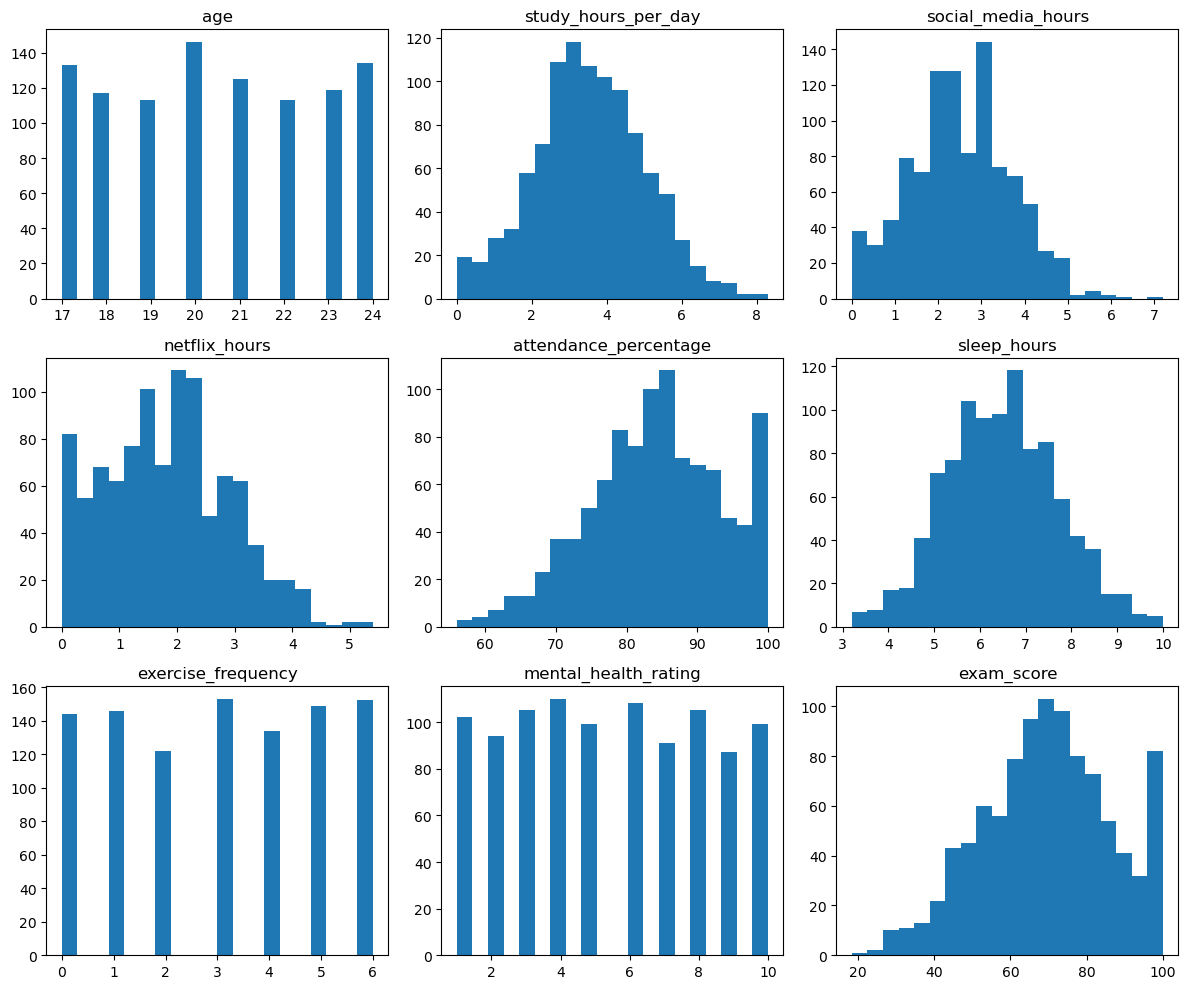

In [8]:
# Removing the student's id before plotting the distributions
df.drop('student_id', axis=1).hist(figsize=(12, 10), bins=20, grid=False)

plt.tight_layout()
plt.show()

From these histograms, we can observe:

Age: Most students between 17-24 years old

Avg. daily study time: Fairly normally distributed, concentrated between 2.5-5 hours

social_media_hours and netflix_hours Both metrix show right skew

attendance_percentage is left-skewed

sleep_hours is normally distributed, concentrated between 5 and 8 hours per day

exam_score is left-skewed


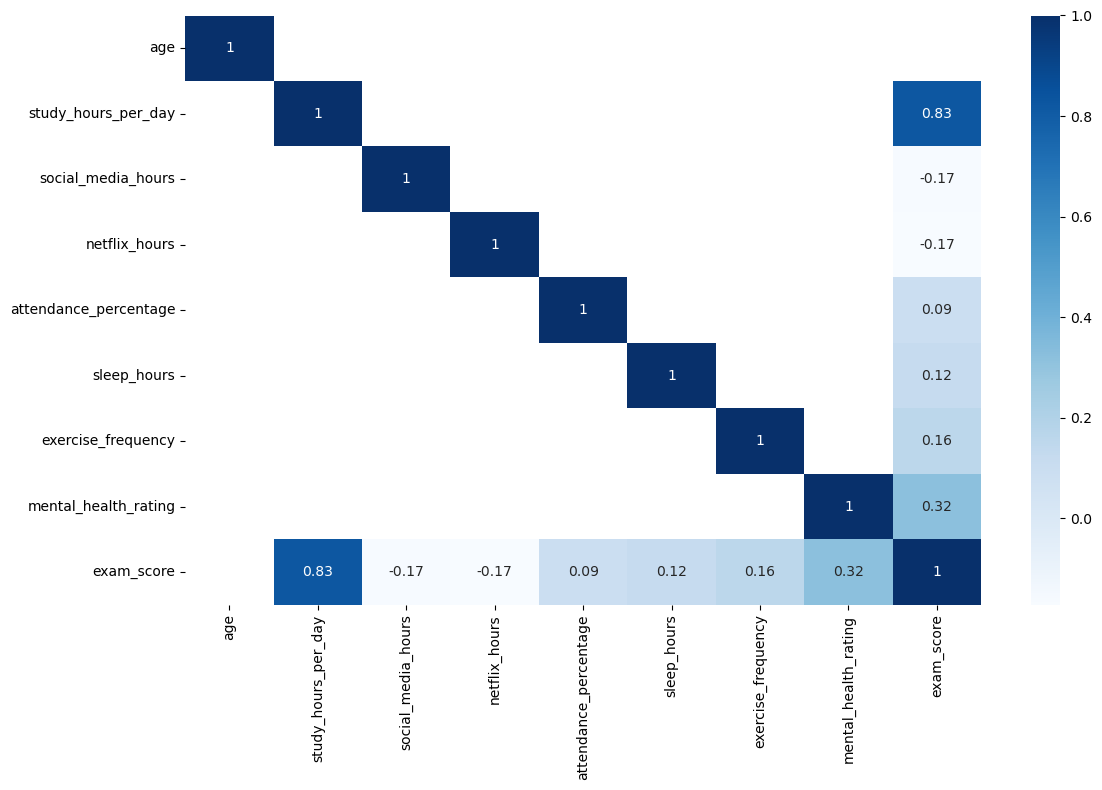

In [9]:
correlations = df.drop('student_id', axis=1).corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(correlations[(correlations > 0.05) | (correlations < -0.05)],
            cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

The correlation heatmap reveals two main relationships:
study_hours_per_day and exam_score - Strong positive correlation (0.83), suggesting students with high study hours got better exam score (no surprize here)

mental_health_rating and exam_score - Positive correlation (0.32), suggesting students with higher mental health rating tend to have better exam score

social_media_hours and netflix_hours both has Negative correlation with exam_score (-0.17), suggesting that students that's spend more hours on social media or netflix has lover exam score. Those relationship are not the very strong ones.



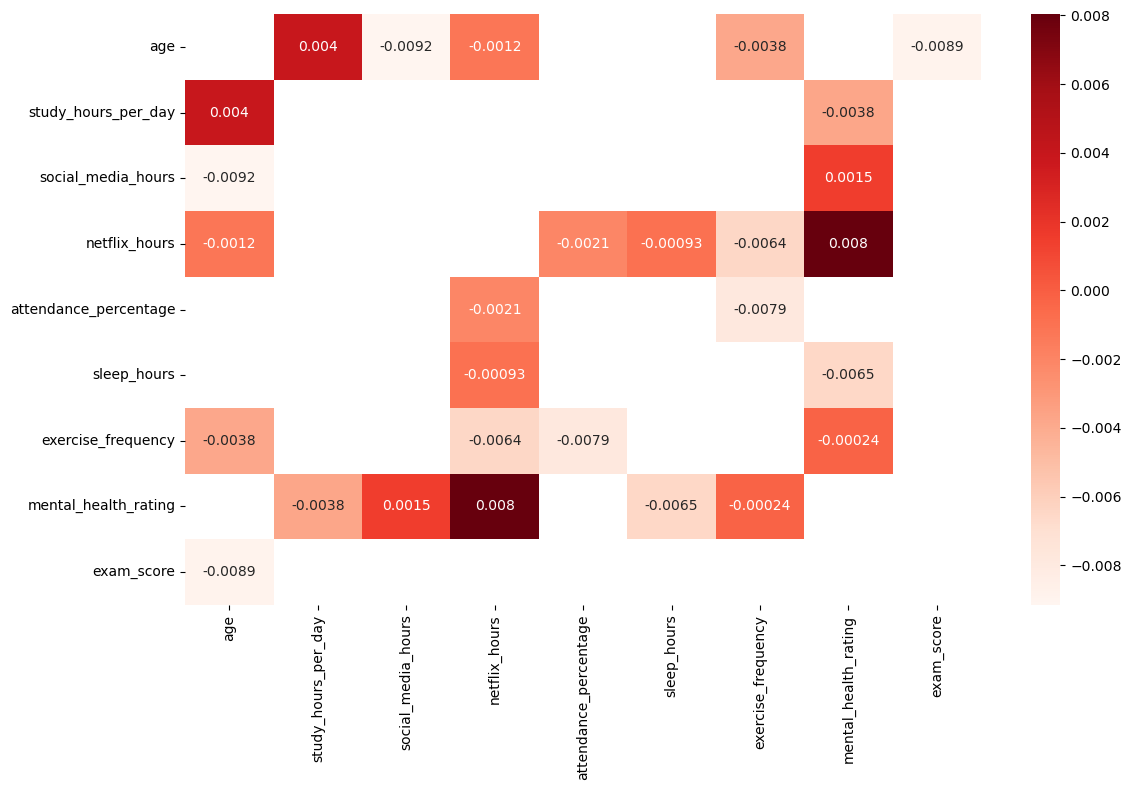

In [10]:
correlations = df.drop('student_id', axis=1).corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(correlations[(correlations >= -0.01) & (correlations <= 0.01)],
            cmap='Reds', annot=True, ax=ax)

plt.tight_layout()
plt.show()


The most weak relationship showed on the Red heatmap

Feature enginiring:
Before we can apply K-means clustering, we need to transform our categorical variables into numerical representations. K-means operates by calculating distances between points in a multi-dimensional space, so all features must be numeric.

part_time_job and extracurricular_participation are both binary in this dataset (Yes/No), we can use a simple mapping.

When a categorical variable has only two categories, we can use a simple binary encoding (0/1) rather than one-hot encoding. This reduces the dimensionality of your data and can lead to more interpretable models.

In [11]:
students_modif = df.copy()

students_modif['part_time_job'] = df['part_time_job'].apply(lambda x: 1 if x == 'Yes' else 0)
students_modif['extracurricular_participation'] = df['extracurricular_participation'].apply(lambda x: 1 if x == 'Yes' else 0)
students_modif.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,0,85.0,8.0,Fair,6,Master,Average,8,1,56.2
1,S1001,20,Female,6.9,2.8,2.3,0,97.3,4.6,Good,6,High School,Average,8,0,100.0
2,S1002,21,Male,1.4,3.1,1.3,0,94.8,8.0,Poor,1,High School,Poor,1,0,34.3
3,S1003,23,Female,1.0,3.9,1.0,0,71.0,9.2,Poor,4,Master,Good,1,1,26.8
4,S1004,19,Female,5.0,4.4,0.5,0,90.9,4.9,Fair,3,Master,Good,1,0,66.4


diet_quality and internet_quality values have a natural ordering (poor<fair/average<good), so we can use ordinal encoding:

In [12]:
# diet_quality
# Fair    437
# Good    378
# Poor    185

# internet_quality
# Good       447
# Average    391
# Poor       162


diet_quality_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2,}
students_modif['diet_quality'] = students_modif['diet_quality'].map(diet_quality_mapping)


internet_quality_mapping = {'Poor': 0, 'Average': 1, 'Good': 2,}
students_modif['internet_quality'] = students_modif['internet_quality'].map(internet_quality_mapping)

students_modif.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,0,85.0,8.0,1,6,Master,1,8,1,56.2
1,S1001,20,Female,6.9,2.8,2.3,0,97.3,4.6,2,6,High School,1,8,0,100.0
2,S1002,21,Male,1.4,3.1,1.3,0,94.8,8.0,0,1,High School,0,1,0,34.3
3,S1003,23,Female,1.0,3.9,1.0,0,71.0,9.2,0,4,Master,2,1,1,26.8
4,S1004,19,Female,5.0,4.4,0.5,0,90.9,4.9,1,3,Master,2,1,0,66.4


parental_education_level


Missing 9% of categorical data (parental_education_level) is generally high enough to require action. Often over the 5% threshold where deletion is risky, but not high enough to warrant removing the entire column.

Here are the best strategies to handle 9% missing categorical data:

1. Impute with Mode (Most Frequent Value) 
When to use: The data is missing completely at random (MCAR) and the column is not heavily skewed.
Action: Replace all NaN or missing entries with the most frequently occurring category in that column.
Pros/Cons: Fast and simple, but can introduce bias if the data is not random. 

2. Create a "Missing" or "Unknown" Category
When to use: The missingness itself might be meaningful (in a "parental_education_level" column, missing might mean not known or None education), or you want to avoid assuming the mode.
Action: Replace missing values with a new label, such as "Unknown", "Missing", or "Other".
Pros/Cons: Retains the information that the data was missing, treating it as a distinct, actionable category. 

3. Model-Based Imputation (Prediction)
When to use: The missing data is correlated with other features in the dataset.
Action: Train a machine learning model (e.g., K-Nearest Neighbors, Random Forest, or Logistic Regression) to predict the missing categorical values based on other, complete features.
Pros/Cons: Usually provides higher accuracy than simple imputation, but is more computationally expensive. 

4. Use Algorithms that Handle Missing Values 
Action: If using Tree-based algorithms (Random Forest, XGBoost, LightGBM), you can often leave the missing values as is (or encode them as -1 or a unique string). These models can treat the missingness as a separate node in the decision tree. 


We will implement first strategy = Impute with Mode
And as parental_education_level has values in natural ordering (High School<Bachelor<Master), so we can use ordinal encoding

In [13]:
students_modif['parental_education_level']=students_modif['parental_education_level'].fillna(df['parental_education_level'].mode()[0])
print(students_modif.info())
print(students_modif['parental_education_level'].value_counts(), end ="\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   int64  
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   int64  
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   in

In [14]:
parental_education_level_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2,}
students_modif['parental_education_level'] = students_modif['parental_education_level'].map(parental_education_level_mapping)
students_modif.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,0,85.0,8.0,1,6,2,1,8,1,56.2
1,S1001,20,Female,6.9,2.8,2.3,0,97.3,4.6,2,6,0,1,8,0,100.0
2,S1002,21,Male,1.4,3.1,1.3,0,94.8,8.0,0,1,0,0,1,0,34.3
3,S1003,23,Female,1.0,3.9,1.0,0,71.0,9.2,0,4,2,2,1,1,26.8
4,S1004,19,Female,5.0,4.4,0.5,0,90.9,4.9,1,3,2,2,1,0,66.4


gender in our case has more than 2 categories (Male/Female/Other) and doesn't have a natural ordering, so we will use one-hot encoding.

One-hot encoding creates a new binary column for each category, which can lead to an "implicit weighting" effect if a variable has many categories. This is something to be aware of when interpreting clustering results, as it can sometimes cause the algorithm to prioritize variables with more categories.

In this mini project, I decided to continue with One-hot encoding AND have a students_modif copy without gender for a small experiment in the end.

In [15]:
student_mod_no_gender = students_modif.copy()
student_mod_no_gender.drop(['gender'], axis=1, inplace=True)

print(student_mod_no_gender.info())
student_mod_no_gender.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   int64  
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   int64  
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   int64  
 11  internet_quality               1000 non-null   int64  
 12  mental_health_rating           1000 non-null   in

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0.0,1.2,1.1,0,85.0,8.0,1,6,2,1,8,1,56.2
1,S1001,20,6.9,2.8,2.3,0,97.3,4.6,2,6,0,1,8,0,100.0
2,S1002,21,1.4,3.1,1.3,0,94.8,8.0,0,1,0,0,1,0,34.3
3,S1003,23,1.0,3.9,1.0,0,71.0,9.2,0,4,2,2,1,1,26.8
4,S1004,19,5.0,4.4,0.5,0,90.9,4.9,1,3,2,2,1,0,66.4


In [16]:
dummies = pd.get_dummies(students_modif[['gender']])

students_modif = pd.concat([students_modif, dummies], axis=1)
students_modif.drop(['gender'], axis=1, inplace=True)

print(students_modif.info())
students_modif.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   int64  
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   int64  
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   int64  
 11  internet_quality               1000 non-null   int64  
 12  mental_health_rating           1000 non-null   in

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_Female,gender_Male,gender_Other
0,S1000,23,0.0,1.2,1.1,0,85.0,8.0,1,6,2,1,8,1,56.2,True,False,False
1,S1001,20,6.9,2.8,2.3,0,97.3,4.6,2,6,0,1,8,0,100.0,True,False,False
2,S1002,21,1.4,3.1,1.3,0,94.8,8.0,0,1,0,0,1,0,34.3,False,True,False
3,S1003,23,1.0,3.9,1.0,0,71.0,9.2,0,4,2,2,1,1,26.8,True,False,False
4,S1004,19,5.0,4.4,0.5,0,90.9,4.9,1,3,2,2,1,0,66.4,True,False,False


Scaling the Data
K-means clustering uses distance-based calculations, so it's important to scale our features to ensure that variables with larger ranges don't dominate the clustering process over variables with smaller ranges.

StandardScaler transforms each feature to have a mean of 0 and a standard deviation of 1. This puts all features on an equal footing, regardless of their original scales. For K-means clustering, this is what ensures that each feature contributes equally to the distance calculations.

In [17]:
X = students_modif.drop('student_id', axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

Finding the Optimal Number of Clusters
One of the challenges with K-means clustering is determining the optimal number of clusters. The elbow method is a common approach, where we plot the sum of squared distances (inertia) for different numbers of clusters and look for an "elbow" point where the rate of decrease sharply changes.

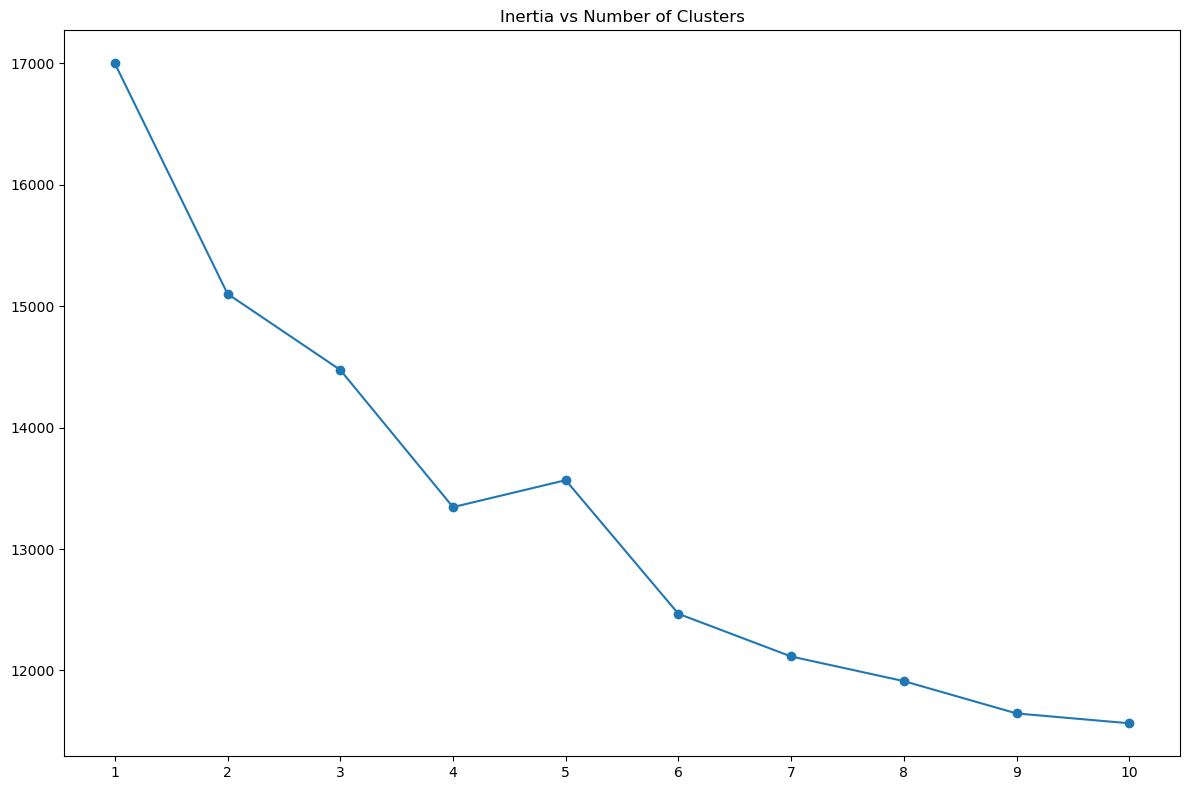

In [18]:
X = pd.DataFrame(X_scaled)
inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

The elbow method isn't always crystal clear, and there's often some judgment involved in selecting the "right" number of clusters. Consider running the clustering multiple times with different numbers of clusters and evaluating which solution provides the most actionable insights for your business context.

In our case, the plot suggests that around 5 clusters could be appropriate, as the decrease in inertia begins to level off in this range. For this analysis, we'll choose 5 clusters, as it appears to strike a good balance between detail and interpretability.

Building the K-Means Clustering Model

In [19]:
model = KMeans(n_clusters=4)
y = model.fit_predict(X_scaled)

# Adding the cluster assignments to our original dataframe
df['CLUSTER'] = y + 1  # Adding 1 to make clusters 1-based instead of 0-based
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,CLUSTER
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,1
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,4
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,2
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,1
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4


In [20]:
df['CLUSTER'].value_counts()

CLUSTER
2    477
1    241
4    240
3     42
Name: count, dtype: int64

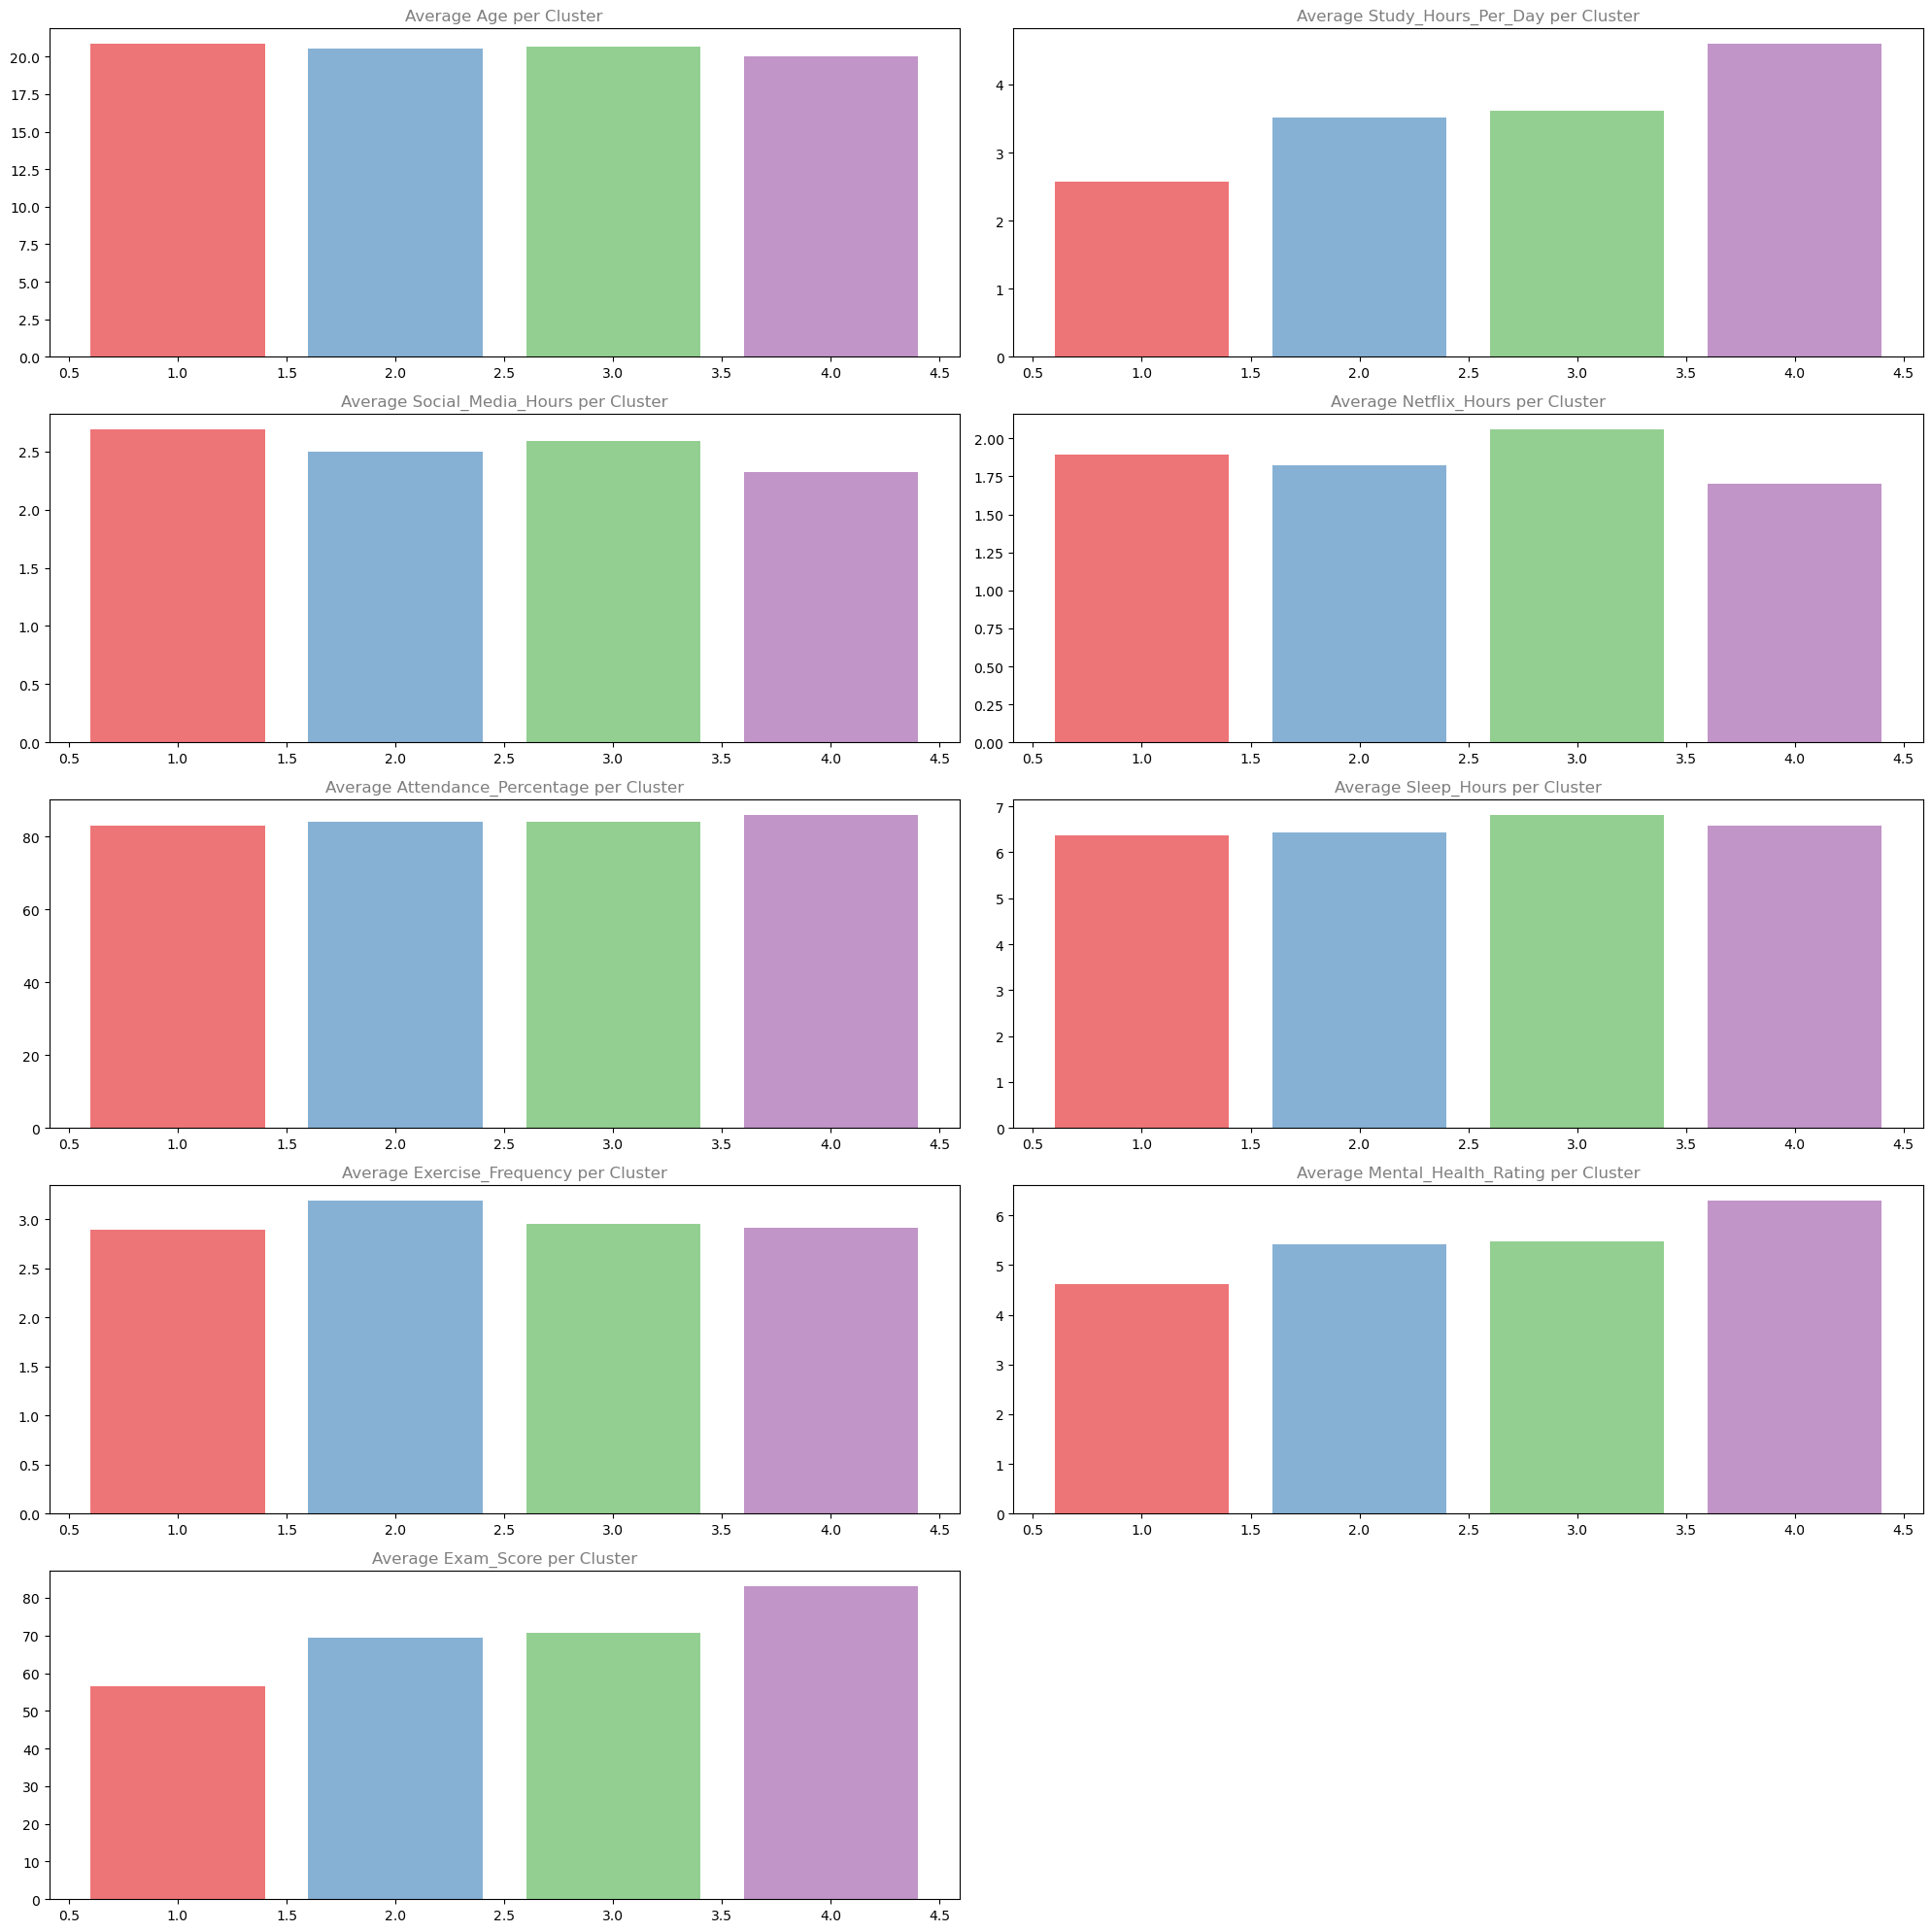

In [21]:
numeric_columns = df.select_dtypes(include=np.number).drop(['CLUSTER'], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

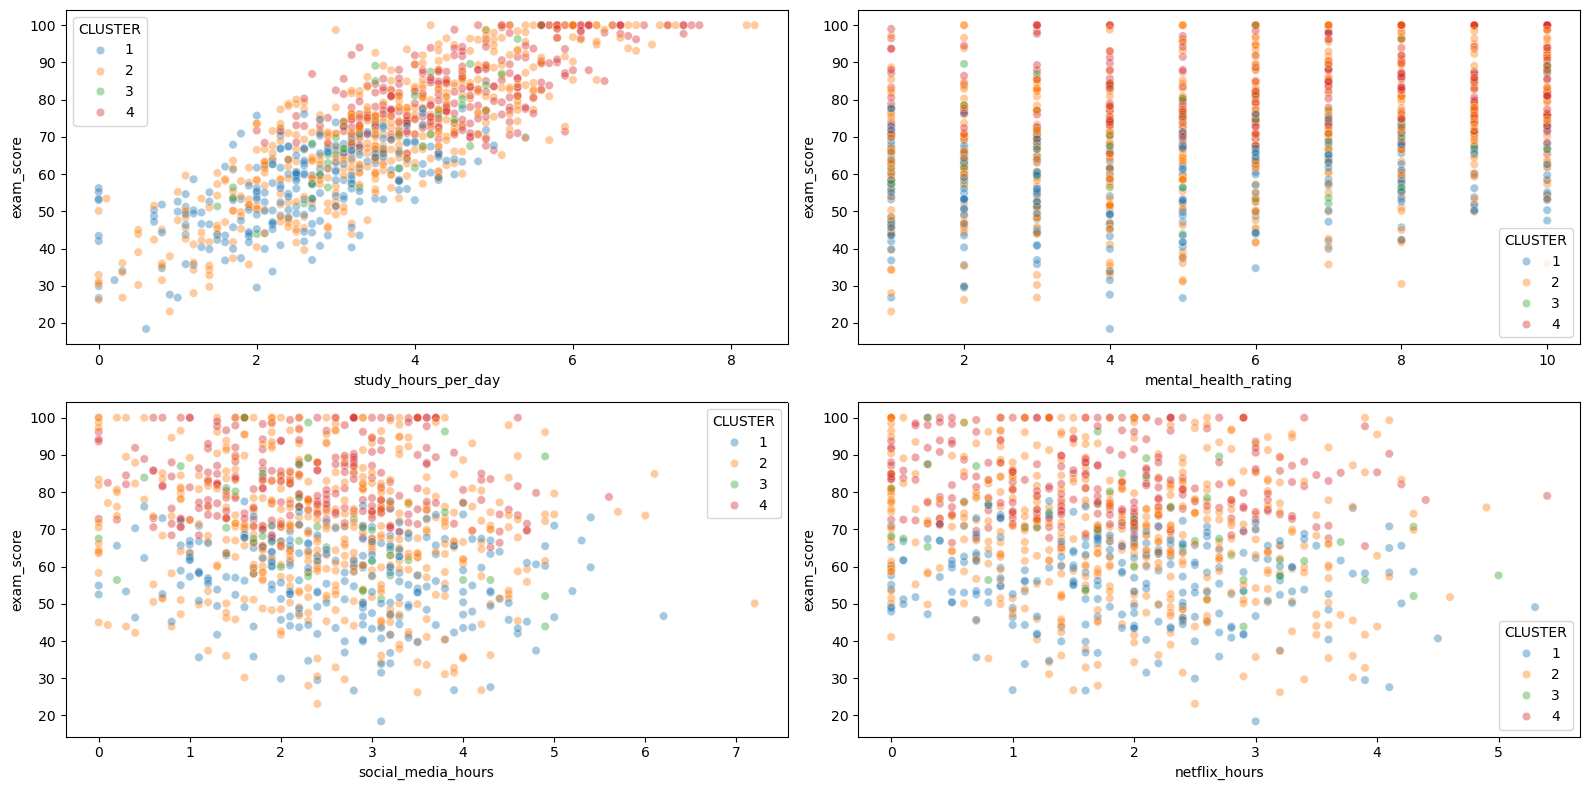

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='study_hours_per_day', y='exam_score', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='mental_health_rating', y='exam_score', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax2)
sns.scatterplot(x='social_media_hours', y='exam_score', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='netflix_hours', y='exam_score', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax4)

plt.tight_layout()
plt.show()

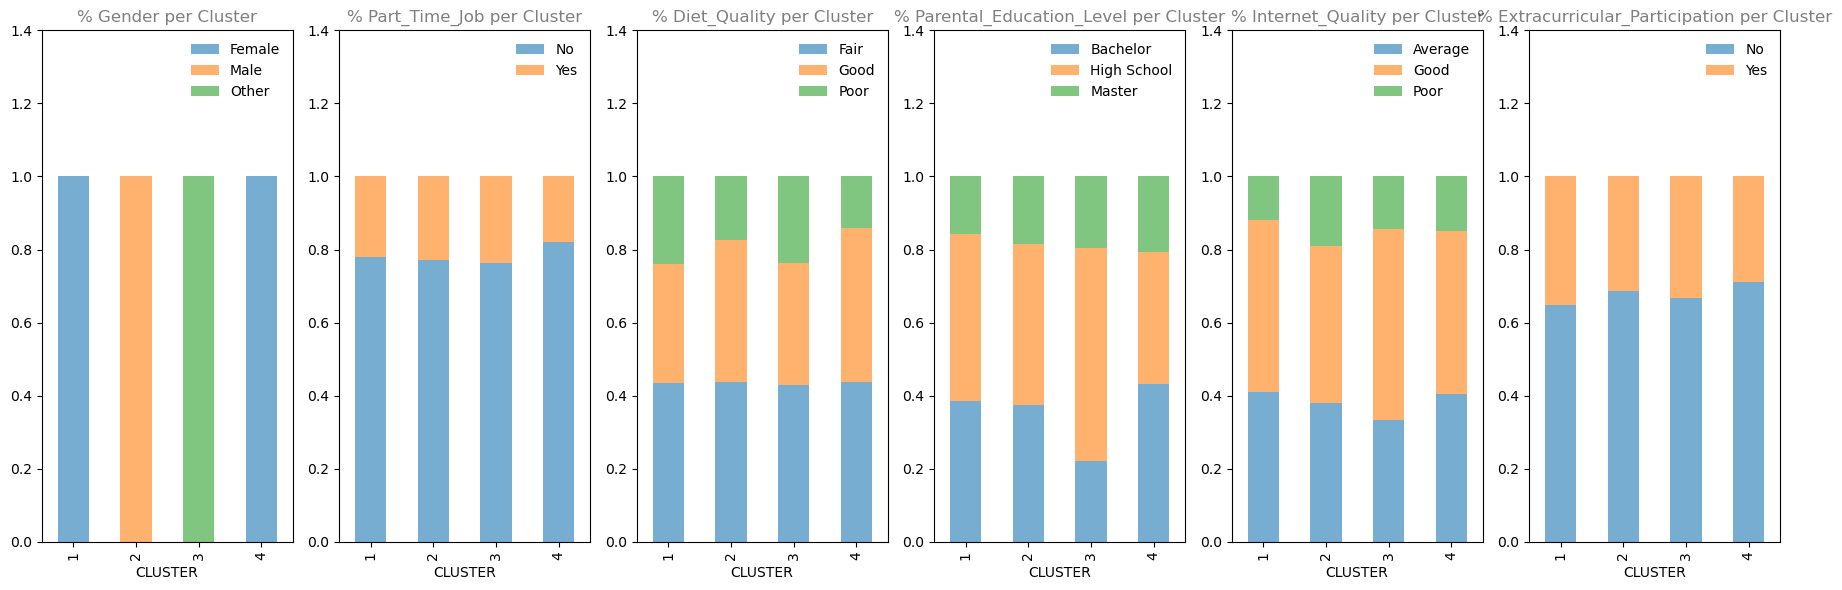

In [23]:
cat_columns = df.select_dtypes(include=['object']).drop(['student_id'], axis=1).columns

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=df['CLUSTER'], columns=df[col], values=df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 6, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

NEED DATA ANALYSIS
Looking on Gender per claster 

Lets apply Standard Scaller to student_mod_no_gender to scale the data in student_mod_no_gender

In [24]:
X = student_mod_no_gender.drop('student_id', axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

Finding the Optimal Number of Clusters

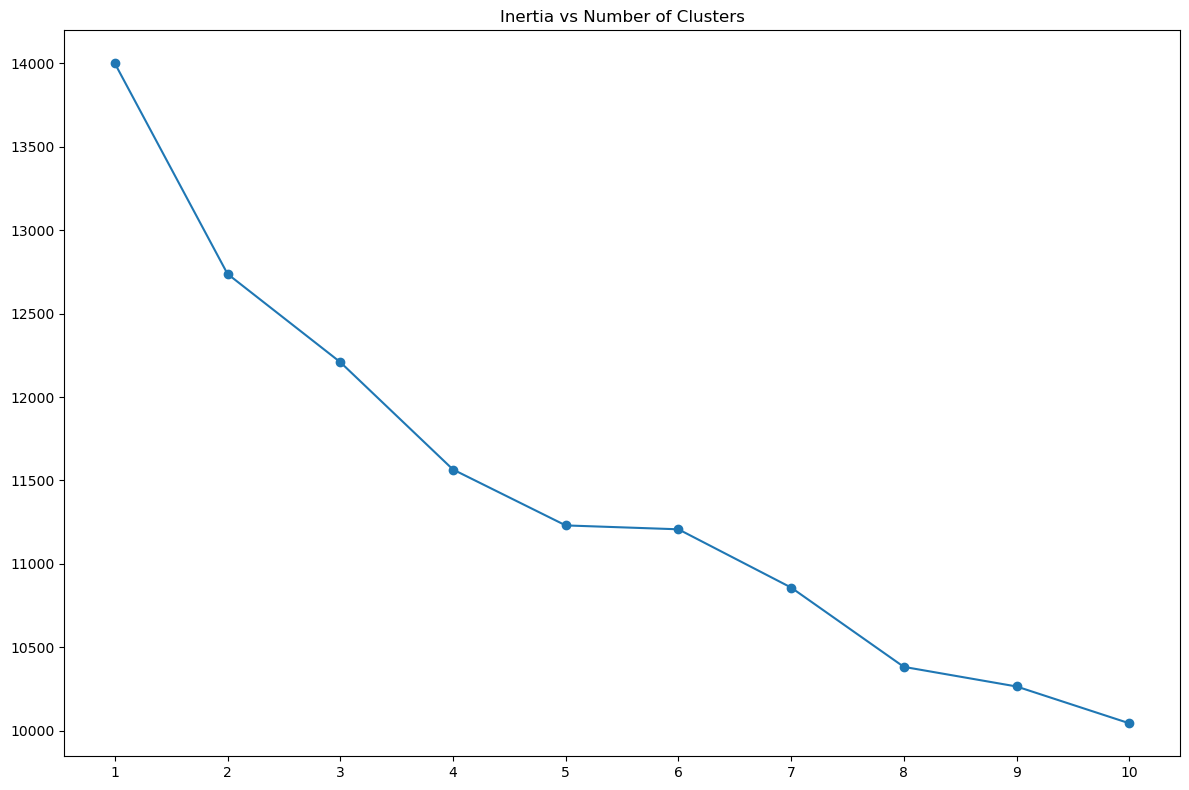

In [28]:
X = pd.DataFrame(X_scaled)
inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

The elbow method after running it several times:
Tthe plot suggests that around 5 clusters could be appropriate, as the decrease in inertia begins to level off in this range. For continue this analysis, we'll choose 5 clusters, as it appears to strike a good balance between detail and interpretability.

Building the clustering model:

In [30]:
model = KMeans(n_clusters=5)
y = model.fit_predict(X_scaled)

# Adding the cluster assignments to our original dataframe
df['CLUSTER'] = y + 1  # Adding 1 to make clusters 1-based instead of 0-based
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,CLUSTER
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,5
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,1
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,5
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,5
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4


In [31]:
df['CLUSTER'].value_counts()

CLUSTER
5    224
1    212
4    196
3    194
2    174
Name: count, dtype: int64

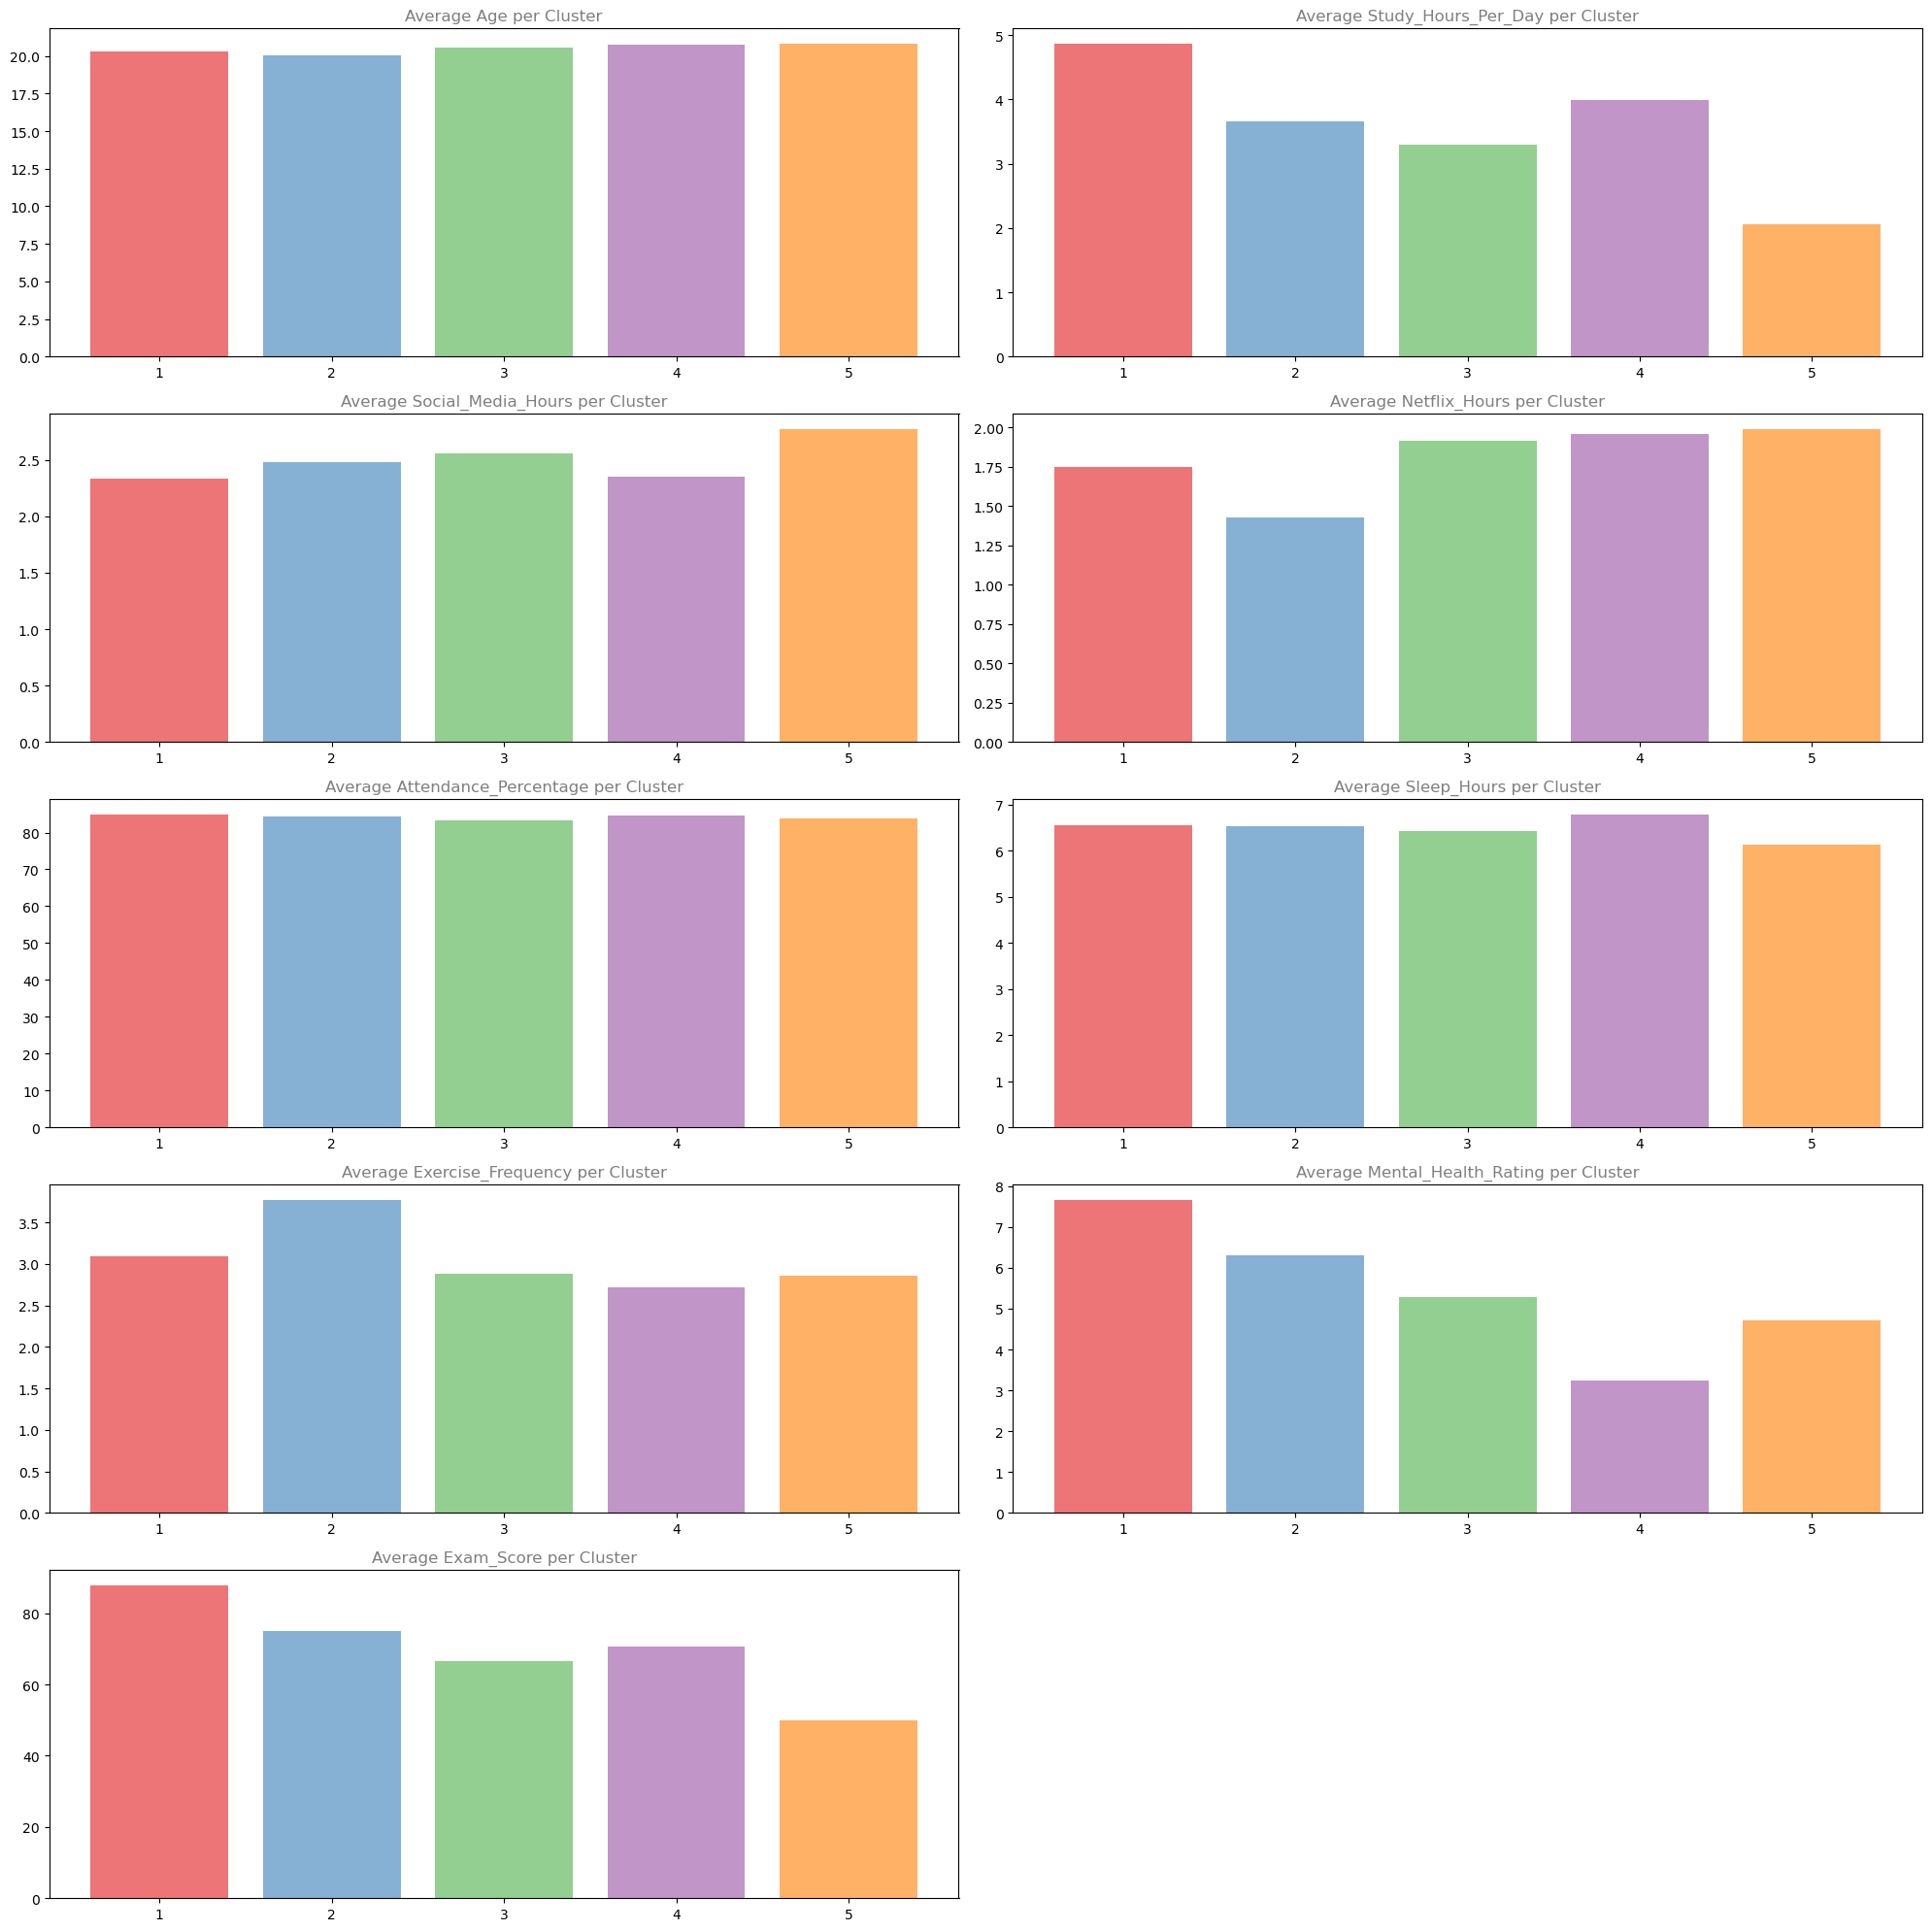

In [32]:
numeric_columns = df.select_dtypes(include=np.number).drop(['CLUSTER'], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

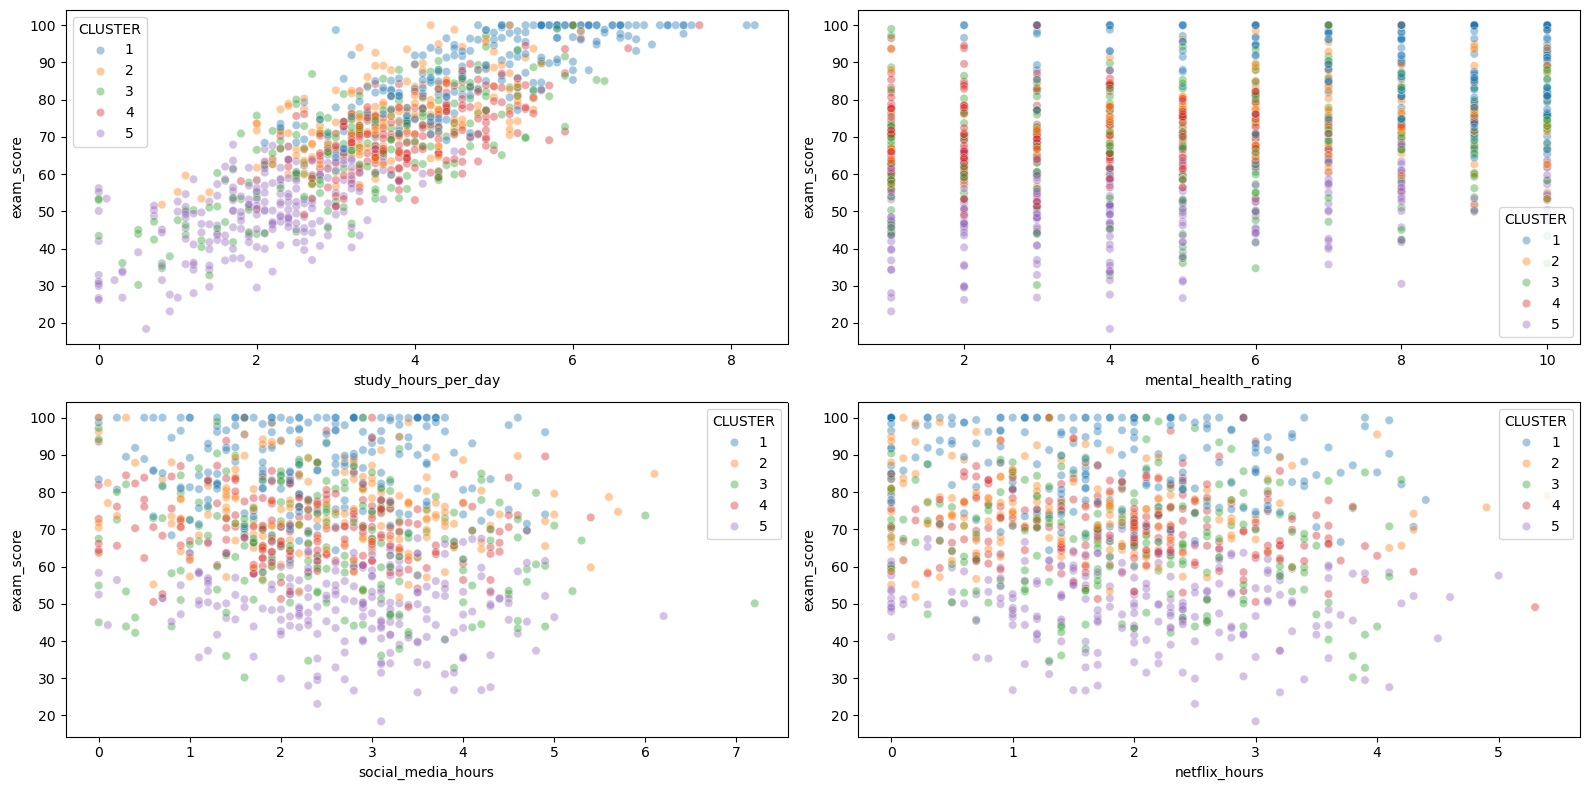

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='study_hours_per_day', y='exam_score', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='mental_health_rating', y='exam_score', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax2)
sns.scatterplot(x='social_media_hours', y='exam_score', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='netflix_hours', y='exam_score', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax4)

plt.tight_layout()
plt.show()

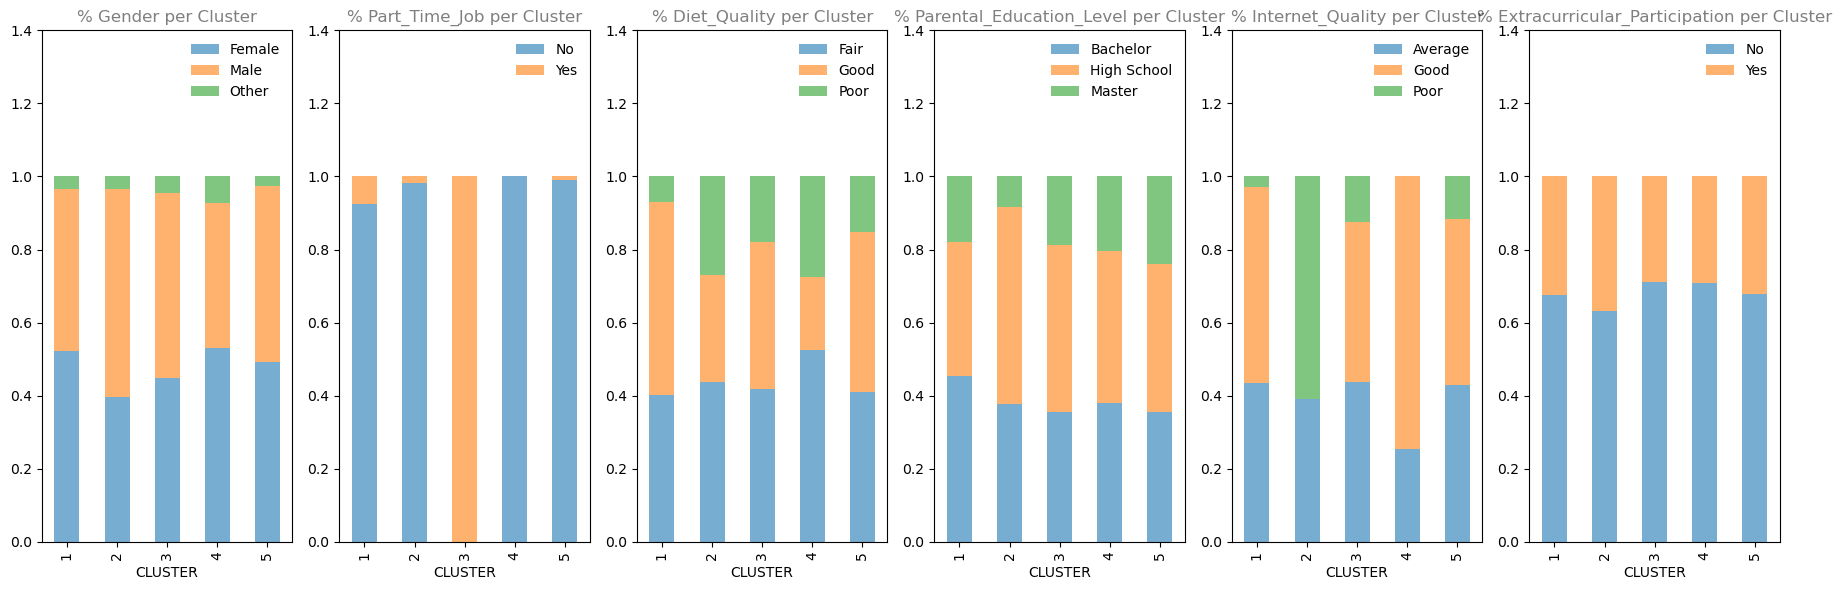

In [34]:
cat_columns = df.select_dtypes(include=['object']).drop(['student_id'], axis=1).columns

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=df['CLUSTER'], columns=df[col], values=df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 6, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

NEED TO REDO:
5 clusters, no gender:
1 cluster - 
2 cluster:  study hours - lowest, social media - low, netflix - highest, sleep hours - lowest, exercize - medium, mental health - medium, gender 0.5, parental education high school, some bachelor, internet quality average to good, extracurricular participation high, exam score = lowest.
3 cluster:  study hours - medium, social media - highest, netflix - medium, exercize - lowest, mental health - lowest, gender 0.5, parental education > bachelor > master, internet quality pretty good, extracurricular participation low, exam score = low.
4 cluster
5 cluster